In [ ]:
import pandas as pd

# Sostituisci 'path/to/TXAdata.csv' con il percorso del tuo file CSV
dataset_path = 'TXAdata.csv'

# Carica il dataset in un DataFrame
df = pd.read_csv(dataset_path)

In [ ]:

column_names = df.columns.tolist()
print(column_names)
df = df.rename(columns={'Unnamed: 0': 'ID'})

# Visualizza le prime righe per verificare il cambiamento
print(df.head())

['Unnamed: 0', 'lastfm_url', 'title', 'artist', 'seeds', 'number_of_emotion_tags', 'valence_tags', 'arousal_tags', 'dominance_tags', 'spotify_id', 'genre', 'lyrics', 'year', 'sentiment']
   ID                                         lastfm_url            title  \
0   0  https://www.last.fm/music/eminem/_/%2527till%2...  Till I Collapse   
1   1  https://www.last.fm/music/metallica/_/st.%2banger        St. Anger   
2   2  https://www.last.fm/music/rick%2bross/_/speedi...          Speedin   
3   3  https://www.last.fm/music/m.i.a./_/bamboo%2bbanga     Bamboo Banga   
4   4    https://www.last.fm/music/dope/_/die%2bmf%2bdie       Die MF Die   

      artist                                       seeds  \
0     Eminem                              ['aggressive']   
1  Metallica                              ['aggressive']   
2  Rick Ross                              ['aggressive']   
3     M.I.A.  ['aggressive', 'fun', 'sexy', 'energetic']   
4       Dope                              ['aggres

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emasc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import logging

# Configurazione del log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [ ]:
from gensim.models import Word2Vec
import re
import nltk
import pandas as pd

# Definisci la funzione per la pulizia del testo
def clean_text(text):
    # Rimuovi i commenti tra parentesi quadre
    text = re.sub(r'\[.*?\]', '', text)
    # Rimuovi i caratteri di interruzione di riga
    text = re.sub(r'\n', ' ', text)
    # Rimuovi la punteggiatura
    text = re.sub(r'[^\w\s]', '', text)
    # Converti il testo in minuscolo
    text = text.lower()
    # Tokenize il testo
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    words = w_tokenizer.tokenize(text)
    # Rimuovi le stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    words = [word for word in words if word not in stopwords]
    # Lemmatizza il testo
    lemmatizer = nltk.stem.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return words

# Esempio di testo tokenizzato
tok_sents = df['lyrics'].apply(clean_text).tolist()

# Addestramento del modello Word2Vec con il testo tokenizzato
w2v_model = Word2Vec(tok_sents, vector_size=100, window=10, min_count=5, sg=1, epochs=20, negative=10)


2023-12-19 11:47:13,218 : INFO : collecting all words and their counts
2023-12-19 11:47:13,218 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-12-19 11:47:13,380 : INFO : PROGRESS: at sentence #10000, processed 1157381 words, keeping 52520 word types
2023-12-19 11:47:13,565 : INFO : PROGRESS: at sentence #20000, processed 2500460 words, keeping 82691 word types
2023-12-19 11:47:13,704 : INFO : collected 101220 word types from a corpus of 3413690 raw words and 27639 sentences
2023-12-19 11:47:13,704 : INFO : Creating a fresh vocabulary
2023-12-19 11:47:13,803 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 26176 unique words (25.86% of original 101220, drops 75044)', 'datetime': '2023-12-19T11:47:13.803674', 'gensim': '4.3.0', 'python': '3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22621-SP0', 'event': 'prepare_vocab'}
2023-12-19 11:47:13,803 : INFO 

2023-12-19 11:48:04,460 : INFO : EPOCH 2 - PROGRESS: at 61.86% examples, 145217 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:05,499 : INFO : EPOCH 2 - PROGRESS: at 66.07% examples, 144846 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:06,519 : INFO : EPOCH 2 - PROGRESS: at 71.34% examples, 145434 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:07,537 : INFO : EPOCH 2 - PROGRESS: at 77.02% examples, 145939 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:08,561 : INFO : EPOCH 2 - PROGRESS: at 81.63% examples, 146230 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:09,562 : INFO : EPOCH 2 - PROGRESS: at 86.88% examples, 146728 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:10,583 : INFO : EPOCH 2 - PROGRESS: at 92.67% examples, 147090 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:11,608 : INFO : EPOCH 2 - PROGRESS: at 98.22% examples, 147379 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:48:11,820 : INFO : EPOCH 2: training on 3413690 raw words (2985223 effective words

2023-12-19 11:49:15,401 : INFO : EPOCH 6 - PROGRESS: at 20.29% examples, 146812 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:16,443 : INFO : EPOCH 6 - PROGRESS: at 27.32% examples, 147631 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:17,462 : INFO : EPOCH 6 - PROGRESS: at 32.99% examples, 148518 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:18,524 : INFO : EPOCH 6 - PROGRESS: at 37.96% examples, 148420 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:19,558 : INFO : EPOCH 6 - PROGRESS: at 43.47% examples, 148683 words/s, in_qsize 6, out_qsize 0
2023-12-19 11:49:20,588 : INFO : EPOCH 6 - PROGRESS: at 47.77% examples, 148958 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:21,596 : INFO : EPOCH 6 - PROGRESS: at 52.17% examples, 148532 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:22,617 : INFO : EPOCH 6 - PROGRESS: at 56.83% examples, 148923 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:49:23,661 : INFO : EPOCH 6 - PROGRESS: at 61.70% examples, 149230 words/s, in_qsiz

2023-12-19 11:50:28,113 : INFO : EPOCH 9 - PROGRESS: at 81.63% examples, 145554 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:29,138 : INFO : EPOCH 9 - PROGRESS: at 86.88% examples, 145881 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:30,188 : INFO : EPOCH 9 - PROGRESS: at 92.67% examples, 146075 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:31,224 : INFO : EPOCH 9 - PROGRESS: at 98.22% examples, 146338 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:31,499 : INFO : EPOCH 9: training on 3413690 raw words (2984625 effective words) took 20.4s, 146439 effective words/s
2023-12-19 11:50:32,537 : INFO : EPOCH 10 - PROGRESS: at 4.05% examples, 134499 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:33,578 : INFO : EPOCH 10 - PROGRESS: at 8.85% examples, 142001 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:34,648 : INFO : EPOCH 10 - PROGRESS: at 14.46% examples, 144112 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:50:35,683 : INFO : EPOCH 10 - PROGRESS: at 20.29% examples,

2023-12-19 11:51:40,934 : INFO : EPOCH 13 - PROGRESS: at 41.02% examples, 135637 words/s, in_qsize 6, out_qsize 0
2023-12-19 11:51:42,012 : INFO : EPOCH 13 - PROGRESS: at 45.41% examples, 135711 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:43,070 : INFO : EPOCH 13 - PROGRESS: at 49.08% examples, 134429 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:44,072 : INFO : EPOCH 13 - PROGRESS: at 52.45% examples, 132404 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:45,189 : INFO : EPOCH 13 - PROGRESS: at 56.83% examples, 132383 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:46,280 : INFO : EPOCH 13 - PROGRESS: at 61.70% examples, 133418 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:47,351 : INFO : EPOCH 13 - PROGRESS: at 66.07% examples, 134183 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:48,359 : INFO : EPOCH 13 - PROGRESS: at 70.96% examples, 134969 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:51:49,407 : INFO : EPOCH 13 - PROGRESS: at 76.72% examples, 135827 words/s

2023-12-19 11:52:55,332 : INFO : EPOCH 16 - PROGRESS: at 96.53% examples, 144591 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:52:55,868 : INFO : EPOCH 16: training on 3413690 raw words (2985446 effective words) took 20.6s, 145004 effective words/s
2023-12-19 11:52:56,965 : INFO : EPOCH 17 - PROGRESS: at 4.05% examples, 127129 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:52:58,032 : INFO : EPOCH 17 - PROGRESS: at 8.85% examples, 136371 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:52:59,100 : INFO : EPOCH 17 - PROGRESS: at 14.46% examples, 140327 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:53:00,166 : INFO : EPOCH 17 - PROGRESS: at 20.29% examples, 142178 words/s, in_qsize 6, out_qsize 0
2023-12-19 11:53:01,210 : INFO : EPOCH 17 - PROGRESS: at 27.32% examples, 143849 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:53:02,245 : INFO : EPOCH 17 - PROGRESS: at 32.99% examples, 144951 words/s, in_qsize 5, out_qsize 0
2023-12-19 11:53:03,313 : INFO : EPOCH 17 - PROGRESS: at 37.96% exam

In [ ]:
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index_to_key)} is {word}")

word #0/26176 is im
word #1/26176 is love
word #2/26176 is dont
word #3/26176 is know
word #4/26176 is like
word #5/26176 is oh
word #6/26176 is get
word #7/26176 is go
word #8/26176 is time
word #9/26176 is youre


In [ ]:
similar_words = w2v_model.wv.most_similar("sad")
print(similar_words)


[('bad', 0.6858090758323669), ('sadder', 0.6534771919250488), ('maudlin', 0.6206918358802795), ('ended', 0.6147733926773071), ('twentythree', 0.5862859487533569), ('song', 0.5773153901100159), ('lonely', 0.56341153383255), ('mad', 0.5574164390563965), ('itsa', 0.5533840656280518), ('nicea', 0.5416389107704163)]


In [ ]:
# Ottieni il vettore associato alla parola "sad"
sad_vector = w2v_model.wv['sad']
print(len(sad_vector), sad_vector)  # Stampa la lunghezza del vettore e i suoi valori

# Trova le parole più simili alla parola "sad"
sad_sims = w2v_model.wv.most_similar('sad', topn=10)
print(sad_sims)  # Stampa le parole simili a "sad" insieme ai punteggi di similarità


100 [ 1.18674681e-01 -2.82652646e-01 -4.28253770e-01 -4.76270244e-02
  3.04093748e-01 -5.73599972e-02 -2.08075032e-01  6.34284735e-01
  6.84607849e-02 -3.62226099e-04 -1.86348841e-01  5.07873595e-01
 -4.14777428e-01  3.39730084e-02 -1.02560423e-01 -1.95067346e-01
 -7.26957396e-02  2.83646464e-01 -2.18315542e-01 -3.54583979e-01
  1.67844146e-01  4.40465212e-01 -2.12651342e-02  3.11830230e-02
 -2.20161349e-01 -4.49222982e-01 -9.28407386e-02  3.05737033e-02
 -1.80460170e-01 -3.01023990e-01 -8.14593509e-02 -6.96300030e-01
  1.54404253e-01 -2.40304157e-01  3.54629070e-01  8.60875994e-02
 -4.96203840e-01 -2.66689640e-02 -1.17492273e-01 -5.09132028e-01
 -5.11058390e-01 -5.93541265e-01  9.76378936e-03  1.51558831e-01
  2.02479493e-02  1.07956203e-02 -6.74354315e-01 -1.39526948e-01
  6.48694634e-02  1.78277434e-03 -3.40226069e-02 -6.88941404e-02
  3.91282588e-02  1.13163754e-01  2.75537461e-01  2.37948611e-01
  4.26213652e-01 -2.59415418e-01 -2.21190184e-01  5.09668350e-01
 -3.26931775e-01  1.6

In [ ]:
# Definisci una funzione per ottenere i vettori delle parole
def get_word_vectors(text, model):
    words = clean_text(text)  # Applica la funzione di pulizia al testo
    vectors = []
    for word in words:
        if word in model.wv.key_to_index:  # Controlla se la parola è presente nel vocabolario del modello
            vectors.append(model.wv[word])  # Ottieni il vettore della parola dal modello Word2Vec
    return vectors
song_vectors_list = []

# Itera su tutte le canzoni nel dataframe
for song_text in df['lyrics']:
    song_vectors = get_word_vectors(song_text, w2v_model)  # Ottieni i vettori delle parole per ciascuna canzone
    song_vectors_list.append(song_vectors)  # Aggiungi i vettori delle parole della canzone alla lista

# song_vectors_list conterrà una lista di liste, dove ciascuna lista corrisponde ai vettori delle parole di una canzone


In [ ]:
import numpy as np

# Creazione di una funzione per calcolare il vettore medio per un insieme di parole
def get_average_vector(words, model):
    vectors = [model.wv[word] for word in words if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Restituisce un vettore di zeri se non ci sono parole nel modello

# Testo tokenizzato per le canzoni tristi (esempio)
sad_songs = df[df['sentiment'] == 1]['lyrics'].apply(clean_text)

# Calcolo del vettore medio per le canzoni tristi
sad_song_vectors = [get_average_vector(words, w2v_model) for words in sad_songs]

# Calcolo del vettore medio complessivo per le canzoni tristi
average_sad_song_vector = np.mean(sad_song_vectors, axis=0)


In [ ]:
average_sad_song_vector

array([ 0.05587713, -0.14719755, -0.01974339, -0.16859411,  0.00420443,
       -0.04723829, -0.04454836,  0.02245   , -0.07165666, -0.01234383,
       -0.24221392,  0.22413144, -0.25295763,  0.15863235, -0.16761185,
       -0.02081803, -0.0117651 , -0.0505946 , -0.06786438, -0.23826822,
        0.20431668,  0.04886895,  0.18628821,  0.07221257,  0.03365844,
       -0.13141478, -0.19340297, -0.11379472, -0.14998175,  0.03006532,
        0.08694889, -0.12729022,  0.17639465, -0.14534086,  0.06830822,
        0.1598544 , -0.19520154,  0.15475221, -0.19357441, -0.14598689,
       -0.10509672, -0.21899459, -0.04676413, -0.19127725,  0.18519378,
       -0.25942355, -0.35807826, -0.25388311, -0.04605365,  0.14310759,
       -0.05657445, -0.17763838, -0.01882741,  0.08365094, -0.10776298,
        0.10884828,  0.23766464, -0.19755176, -0.00725311, -0.03764356,
       -0.17711257, -0.00934995, -0.19331529,  0.17354158, -0.25010764,
        0.07120165,  0.18422029, -0.00498814, -0.31265998,  0.06

In [ ]:
# Definiamo le parole chiave associate alle emozioni negative
negative_emotions_keywords = ['sad', 'unhappy', 'depressed', 'miserable', 'gloomy']

# Lista per memorizzare i risultati
similarity_scores = []

# Calcoliamo la similarità tra le parole chiave delle emozioni negative e le parole nei testi delle canzoni per ogni anno
for year in df['year'].unique():
    # Selezioniamo le canzoni per l'anno corrente
    songs_for_year = df[df['year'] == year]['lyrics'].tolist()

    # Calcoliamo la similarità media per l'anno corrente
    total_similarity = 0
    for song in songs_for_year:
        song_words = clean_text(song)
        for keyword in negative_emotions_keywords:
            # Calcoliamo la similarità tra ogni parola chiave e le parole del testo della canzone
            similarity = sum([w2v_model.wv.similarity(keyword, word) for word in song_words if word in w2v_model.wv.index_to_key])
            total_similarity += similarity

    # Calcoliamo la similarità media per le parole chiave delle emozioni negative e le canzoni per l'anno corrente
    average_similarity = total_similarity / (len(songs_for_year) * len(negative_emotions_keywords))

    # Memorizziamo il risultato
    similarity_scores.append((year, average_similarity))

# Stampiamo i risultati
for year, similarity in similarity_scores:
    print(f"Anno {year}: Similarità media = {similarity}")


Anno 2002.0: Similarità media = 28.05454181523739
Anno 2003.0: Similarità media = 27.631435837864696
Anno 2007.0: Similarità media = 28.659228096743306
Anno 2001.0: Similarità media = 27.80453960917319
Anno 2004.0: Similarità media = 27.526626653326755
Anno 2016.0: Similarità media = 35.69651876672312
Anno 1995.0: Similarità media = 28.987035719383552
Anno 1999.0: Similarità media = 27.51618646246562
Anno 1981.0: Similarità media = 26.55802836649395
Anno 2010.0: Similarità media = 28.831328891694163
Anno 2000.0: Similarità media = 29.046822674562534
Anno 2006.0: Similarità media = 28.282296918386344
Anno 1988.0: Similarità media = 28.561360834990364
Anno 1964.0: Similarità media = 62.18995869477257
Anno 2014.0: Similarità media = 33.059104234987075
Anno 2009.0: Similarità media = 28.75151961968566
Anno 2008.0: Similarità media = 28.06630202602163
Anno 1998.0: Similarità media = 26.203373091598007
Anno 1994.0: Similarità media = 27.12742237033569
Anno 1997.0: Similarità media = 30.20943

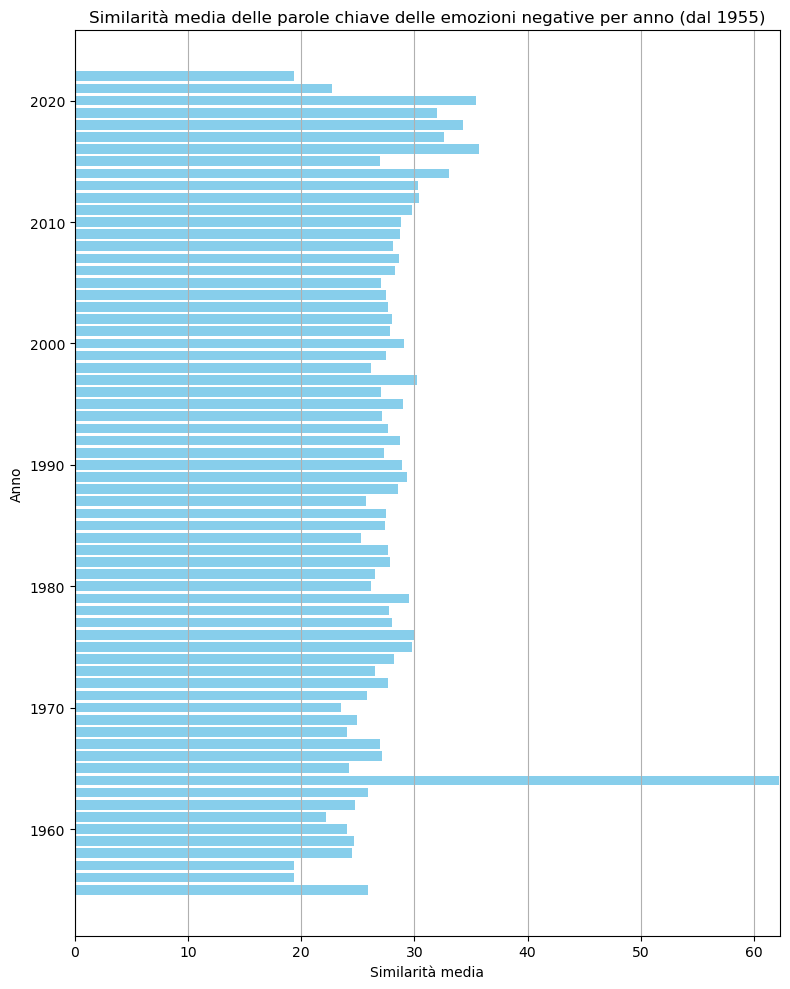

In [ ]:
import matplotlib.pyplot as plt

# Filtra i risultati per considerare solo gli anni dal 1955 in poi
filtered_similarity_scores = [result for result in similarity_scores if result[0] >= 1955]
years = [year for year, _ in filtered_similarity_scores]
similarities = [similarity for _, similarity in filtered_similarity_scores]

# Crea il grafico a barre
plt.figure(figsize=(8, 10))
plt.barh(years, similarities, color='skyblue')
plt.title('Similarità media delle parole chiave delle emozioni negative per anno (dal 1955)')
plt.xlabel('Similarità media')
plt.ylabel('Anno')
plt.xlim(0, max(similarities) + 0.1)  # Imposta il limite sull'asse x
plt.grid(axis='x')
plt.tight_layout()

# Mostra il grafico
plt.show()


